In [3]:
import os
import fnmatch
import pandas as pd
import geopandas as gpd
import csv

root_path = os.getcwd() + '\의료,교육,상업,복지'
df = pd.DataFrame()
encodings = ['cp949', 'utf8', 'utf16', 'euckr']


#utf-8로 인코딩 안 된 엑셀파일은 일일이 utf-8 csv로 바꿔야 하는건가???

os.makedirs(os.getcwd()+'\yumin'+'\충청남도',exist_ok=True)
folder_list = [name for name in os.listdir(root_path)]

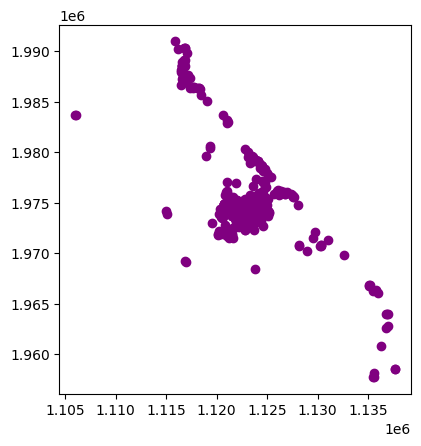

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

file = './의료,교육,상업,복지/GM_COMM_LCCF_INF/상업생활밀착형상업시설정보_강원도_강릉시.shp'
infra_map = gpd.read_file(file)

ax= infra_map.convex_hull.plot(color='purple')
plt.show()



<Axes: >

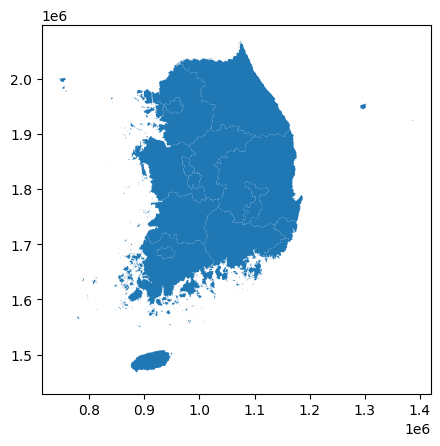

In [5]:
## 행정구역 경계 맵 (전국)##
file = os.getcwd()+'\ctprvn_20230729\ctprvn.shp'
seoul_boundary = gpd.read_file(file,encoding='cp949')
seoul_boundary.plot()

folder: GM_COMM_LCCF_INF
file: 상업생활밀착형상업시설정보_충청남도_계룡시.shp
file: 상업생활밀착형상업시설정보_충청남도_공주시.shp
file: 상업생활밀착형상업시설정보_충청남도_금산군.shp
file: 상업생활밀착형상업시설정보_충청남도_논산시.shp
file: 상업생활밀착형상업시설정보_충청남도_당진시.shp
file: 상업생활밀착형상업시설정보_충청남도_보령시.shp
file: 상업생활밀착형상업시설정보_충청남도_부여군.shp
file: 상업생활밀착형상업시설정보_충청남도_서산시.shp
file: 상업생활밀착형상업시설정보_충청남도_서천군.shp
file: 상업생활밀착형상업시설정보_충청남도_아산시.shp
file: 상업생활밀착형상업시설정보_충청남도_예산군.shp
file: 상업생활밀착형상업시설정보_충청남도_천안시_동남구.shp
file: 상업생활밀착형상업시설정보_충청남도_천안시_서북구.shp
file: 상업생활밀착형상업시설정보_충청남도_청양군.shp
file: 상업생활밀착형상업시설정보_충청남도_태안군.shp
file: 상업생활밀착형상업시설정보_충청남도_홍성군.shp
folder: GM_COMM_LSSC_INF
file: 상업대규모복합상가정보_충청남도_계룡시.shp
file: 상업대규모복합상가정보_충청남도_공주시.shp
file: 상업대규모복합상가정보_충청남도_금산군.shp
file: 상업대규모복합상가정보_충청남도_논산시.shp
file: 상업대규모복합상가정보_충청남도_당진시.shp
file: 상업대규모복합상가정보_충청남도_보령시.shp
file: 상업대규모복합상가정보_충청남도_부여군.shp
file: 상업대규모복합상가정보_충청남도_서산시.shp
file: 상업대규모복합상가정보_충청남도_서천군.shp
file: 상업대규모복합상가정보_충청남도_아산시.shp
file: 상업대규모복합상가정보_충청남도_예산군.shp
file: 상업대규모복합상가정보_충청남도_천안시_동남구.shp
file: 상업대규모복합상가정보_충청남도_천안시_서북구.shp
fil

<Axes: >

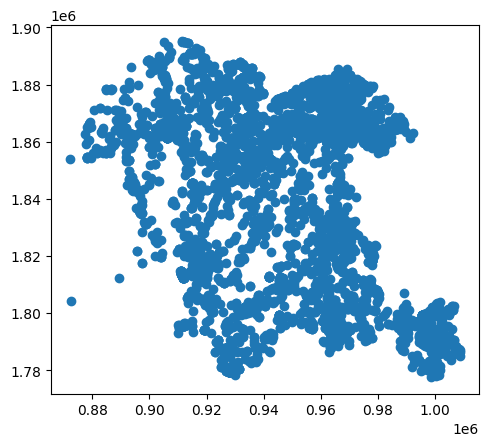

In [6]:

df = gpd.GeoDataFrame()

for folder in os.listdir(root_path):
    print("folder:",folder)
    for file in os.listdir(root_path+'\\'+folder):
        
        if fnmatch.fnmatch(file,'*충청남도*.shp'):
            print("file:",file)
            #파일명 제일 앞이 인프라 종류
            infra = file.split('_')[0]
            file_path = root_path+'\\'+folder+'\\'+file

            file = gpd.read_file(file_path)
            new_df = gpd.GeoDataFrame(file)
            
            #인프라 종류를 칼럼으로 추가
            new_df['인프라종류'] = infra
            df = pd.concat([df,new_df])
            



print(df['인프라종류'].unique(),df['인프라종류'].value_counts())
print(df['SGG_NM'].unique())
print(df['EMD_NM'].unique())
df.plot()

    

In [19]:
infra_list =  df['인프라종류'].unique()
SGG_list = df['SGG_NM'].unique()
EMD_list = df['EMD_NM'].unique()


for i in SGG_list:
    for j in EMD_list:
        for k in infra_list:
            print(df[(df['SGG_NM'] == i) & (df['EMD_NM'] == j) & (df['인프라종류'] == k)])
        


        
        



  CTPV_NM   CTPV_CD SGG_NM    SGG_CD EMD_NM    EMD_CD  \
0    충청남도  44000000    계룡시  44250000    금암동  44250101   
1    충청남도  44000000    계룡시  44250000    금암동  44250101   
2    충청남도  44000000    계룡시  44250000    금암동  44250101   
3    충청남도  44000000    계룡시  44250000    금암동  44250101   
4    충청남도  44000000    계룡시  44250000    금암동  44250101   
5    충청남도  44000000    계룡시  44250000    금암동  44250101   
6    충청남도  44000000    계룡시  44250000    금암동  44250101   
7    충청남도  44000000    계룡시  44250000    금암동  44250101   
8    충청남도  44000000    계룡시  44250000    금암동  44250101   

                       ADDR                  REF_ADDR SHOP_NM      BO_NM  ...  \
0     충청남도 계룡시 금암동 계룡대로 327     충청남도 계룡시 금암동 계룡대로 327    GS25      계룡금암점  ...   
1      충청남도 계룡시 금암동 금암로 139      충청남도 계룡시 금암동 금암로 139   세븐일레븐   계룡금암빌리지점  ...   
2     충청남도 계룡시 금암동 대실남북로 36     충청남도 계룡시 금암동 대실남북로 36      CU  계룡미소지움2차점  ...   
3  충청남도 계룡시 금암동 서금암3길 16-13  충청남도 계룡시 금암동 서금암3길 16-13   세븐일레븐      계룡금암점  ...   
4      충청남도 계룡시 금암동 서금암3

<Axes: >

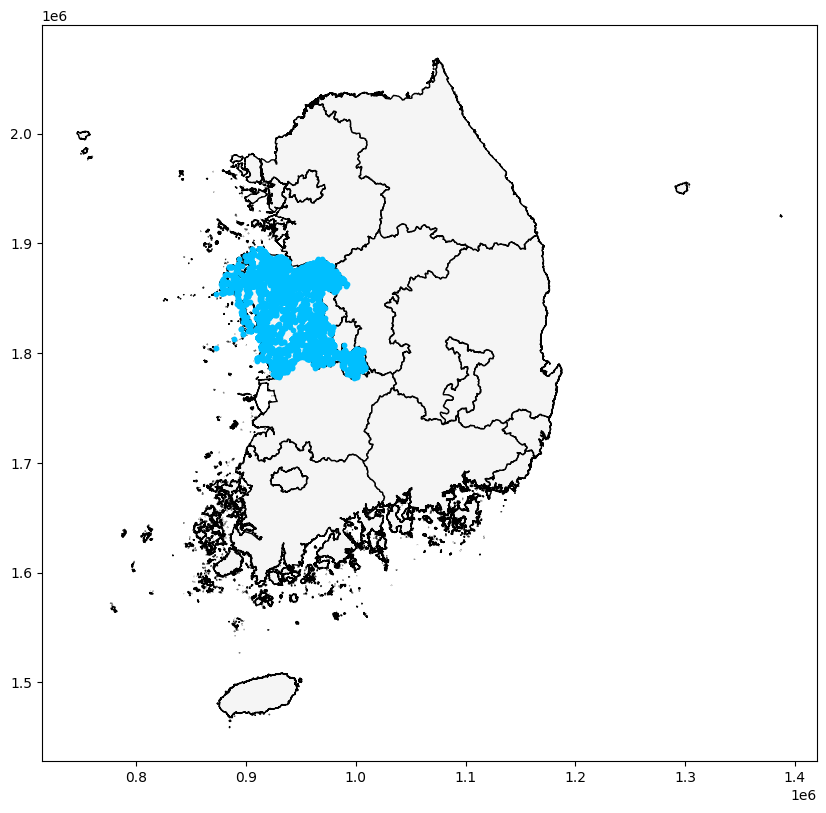

In [72]:
### 두 맵을 합치기 ###

seoul_boundary.crs = "EPSG:5179"
map = gpd.sjoin(df.to_crs(epsg=5179), seoul_boundary)
ax = seoul_boundary.plot(figsize=(10,10), color='whitesmoke', edgecolor='black', linewidth=1)
# ax.axis('off')
map.to_crs(epsg=5179).plot(ax=ax, color='deepskyblue', markersize=10)

In [4]:

for folder in os.listdir(root_path):
    print("folder:",folder)
    for file in os.listdir(root_path+'\\'+folder):
        
        if fnmatch.fnmatch(file,'*충청남도*.csv'):
            print("file:",file)
            file_path = root_path+'\\'+folder+'\\'+file

            f = open(file_path,encoding='utf8')
            reader = csv.reader(f)
            csv_list = []
            for i in reader:
                csv_list.append(i)
            f.close()
            new_df = pd.DataFrame(csv_list)
            # new_df = pd.read_excel(root_path+'\\'+folder+'\\'+file,engine='openpyxl')
            df = pd.concat([df,new_df])
            print(df)



print(folder_list)


    

folder: GM_COMM_LCCF_INF
file: 상업생활밀착형상업시설정보_충청남도_계룡시.csv
          0         1       2         3       4         5   \
0   ﻿CTPV_NM   CTPV_CD  SGG_NM    SGG_CD  EMD_NM    EMD_CD   
1       충청남도  44000000     계룡시  44250000     금암동  44250101   
2       충청남도  44000000     계룡시  44250000     금암동  44250101   
3       충청남도  44000000     계룡시  44250000     금암동  44250101   
4       충청남도  44000000     계룡시  44250000     금암동  44250101   
..       ...       ...     ...       ...     ...       ...   
19      충청남도  44000000     계룡시  44250000     엄사면  44250315   
20      충청남도  44000000     계룡시  44250000     엄사면  44250315   
21      충청남도  44000000     계룡시  44250000     엄사면  44250315   
22      충청남도  44000000     계룡시  44250000     엄사면  44250315   
23      충청남도  44000000     계룡시  44250000     엄사면  44250315   

                          6                         7        8          9   \
0                       ADDR                  REF_ADDR  SHOP_NM      BO_NM   
1      충청남도 계룡시 금암동 계룡대로 327     충청남도 계룡시

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 8: invalid start byte